# **CS224W - Colab 1**

In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started!

**Note**: Make sure to **sequentially run all the cells**, so that the intermediate variables / packages will carry over to the next cell

# 1 Graph Basics
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

## Setup
We will heavily use NetworkX in this Colab.

In [2]:
import networkx as nx

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph which describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [4]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

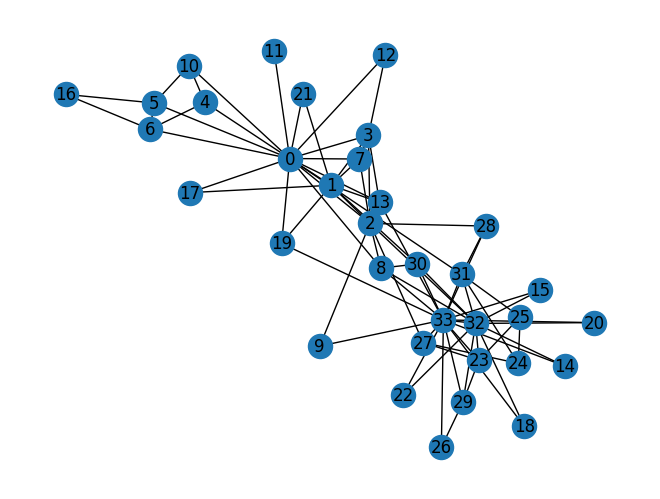

In [5]:
# Visualize the graph
nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the karate club network? (5 Points)

In [6]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############
  avg_degree = (2*num_edges)/num_nodes
  #########################################
  avg_degree = round(avg_degree)
  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
print("num_edges is", num_edges, "and","num_nodes is",num_nodes)
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

num_edges is 78 and num_nodes is 34
Average degree of karate club network is 5


## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)

In [7]:
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round 
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note: 
  ## 1: Please use the appropriate NetworkX clustering function
  avg_cluster_coef = nx.average_clustering(G)
  avg_cluster_coef = round(avg_cluster_coef, 2) 
  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Page Rank measures importance of nodes in a graph using the link structure of the web. A “vote” from an important page is worth more. Specifically, if  a page $i$ with importance $r_i$ has $d_i$ out-links, then each link gets $\frac{r_i}{d_i}$ votes. Thus, the importance of a Page $j$, represented as $r_j$ is the sum of the votes on its in links.
$$
r_j = \sum_{i \rightarrow j} \frac{r_i}{d_i}
$$
, where $d_i$ is the out degree of node $i$.

The PageRank algorithm (used by Google) outputs a probability distribution which represent the likelihood of a random surfer clicking on links will arrive at any particular page. At each time step, the random surfer has two options
- With prob. $\beta$, follow a link at random
- With prob. $1- \beta$, jump to a random page

Thus, the importance of a particular page is calculated with the following PageRank equation:
 $$r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$$

Please complete the code block by implementing the above PageRank equation for node 0.

Note - You can refer to more information from the slides here - http://snap.stanford.edu/class/cs224w-2020/slides/04-pagerank.pdf

In [ ]:
def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
  # The return value r1 is one interation PageRank value for the input node.
  # Please round r1 to 2 decimal places.

  r1 = 0

  ############# Your code here ############
  ## Note:
  ## 1: You should not use nx.pagerank
  
  #########################################

  return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

In [8]:
import networkx as nx

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos al grafo
G.add_nodes_from([1, 2, 3, 4])

# Agregar arcos al grafo
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(3, 1)
G.add_edge(4, 3)

# Parámetro de amortiguación
beta = 0.85

# Número de nodos en el grafo
N = len(G.nodes())

# Inicializar PageRank
pagerank = {node: 1 / N for node in G.nodes()}

# Número máximo de iteraciones
max_iterations = 1

# Iteraciones de PageRank
for _ in range(max_iterations):
    new_pagerank = {}
    for node in G.nodes():
        new_pagerank[node] = (1 - beta) / N
        for predecessor in G.predecessors(node):
            out_degree = len(G.out_edges(predecessor))
            new_pagerank[node] += beta * pagerank[predecessor] / out_degree
    pagerank = new_pagerank

# Imprimir los valores de PageRank para cada nodo
for node, score in pagerank.items():
    print(f'Nodo {node}: PageRank = {score:.4f}')


Nodo 1: PageRank = 0.2500
Nodo 2: PageRank = 0.1437
Nodo 3: PageRank = 0.5687
Nodo 4: PageRank = 0.0375


In [9]:
# Initialize parameters
beta = 0.85  # Damping factor
N = 10  # Total number of nodes in the graph

# Initialize the PageRank values for each node
pagerank = [1 / N] * N

# Define the out-degrees for each node (you can adjust these based on your specific graph)
out_degrees = [2, 2, 1, 3, 2, 1, 2, 1, 3, 2]

# Calculate the PageRank value for node 0 after one iteration
node_0_pagerank = (1 - beta) / N  # Initialize with (1 - beta) * (1 / N)

# Sum the contributions from other nodes that link to node 0
for i in range(N):
    if i != 0:  # Exclude node 0 itself
        node_0_pagerank += beta * pagerank[i] / out_degrees[i]

# Print the PageRank value for node 0 after one iteration
print(f"PageRank value for node 0 after one iteration: {node_0_pagerank:.4f}")


PageRank value for node 0 after one iteration: 0.4967
